# 피마 인디언 당뇨병 예측

In [1]:
from google.colab import files
up = files.upload()
filename = list(up.keys())[0]

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv(filename, header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

### 스케일 변환(ex. 정규화)이 신경망 학습에 영향을 주는가?


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

* 원본 데이터

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    df.values[:, :-1], df.values[:, -1], stratify = df.values[:, -1], random_state = 2022
)

In [93]:
model = Sequential([
                    Dense(12, input_dim = 8, activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 12)                108       
                                                                 
 dense_40 (Dense)            (None, 8)                 104       
                                                                 
 dense_41 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs = 200, batch_size = 50)

Epoch 1/200
10/10 [==============================] - 1s 22ms/step - loss: 5.5504 - accuracy: 0.5261 - val_loss: 5.2017 - val_accuracy: 0.5086
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 4.3285 - accuracy: 0.5652 - val_loss: 3.8165 - val_accuracy: 0.5517
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 3.1718 - accuracy: 0.5804 - val_loss: 2.6657 - val_accuracy: 0.5948
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 2.1737 - accuracy: 0.6000 - val_loss: 1.7060 - val_accuracy: 0.6638
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 1.3670 - accuracy: 0.5957 - val_loss: 1.0994 - val_accuracy: 0.6034
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 1.0682 - accuracy: 0.5783 - val_loss: 0.9220 - val_accuracy: 0.6121
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 1.0205 - accuracy: 0.5652 - val_loss: 0.8986 - val_accuracy: 0.5776
Epoch 8/200


In [95]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.6354


[0.7023420333862305, 0.6354166865348816]

* 표준화 

In [78]:
scaled = StandardScaler().fit_transform(df.values[:, :-1])
X_train2, X_test2, y_train, y_test = train_test_split(
    scaled, df.values[:, -1], stratify = df.values[:, -1], random_state = 2022
)

In [79]:
model2 = Sequential([
                    Dense(12, input_dim = 8, activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 12)                108       
                                                                 
 dense_34 (Dense)            (None, 8)                 104       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history2 = model2.fit(X_train2, y_train, validation_split=0.2,
                    epochs = 200, batch_size = 50)

In [81]:
model2.evaluate(X_test2, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.5955 - accuracy: 0.7396


[0.595497727394104, 0.7395833134651184]

In [82]:
import matplotlib.pyplot as plt

In [83]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

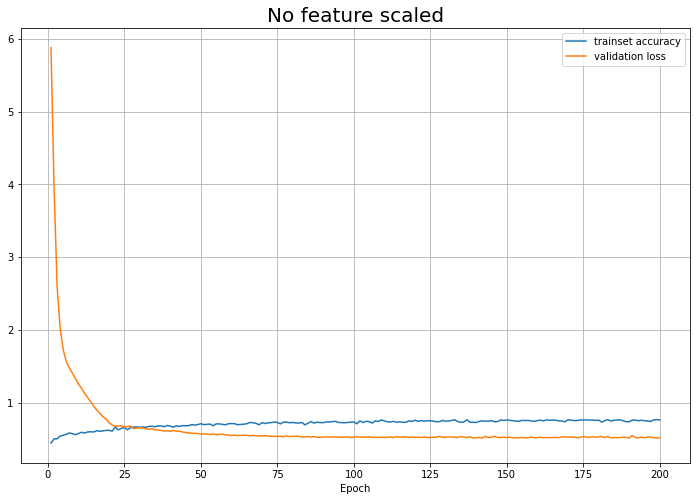

In [96]:
xs = np.arange(1, len(acc) + 1)     # epoch가 50이므로 그것보다 1 더해준다
plt.figure(figsize=(12, 8))
plt.plot(xs, acc, ms = 10, label = 'trainset accuracy')
plt.plot(xs, val_loss, ms = 10, label = 'validation loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.title('No feature scaled', fontsize = 20)
plt.show()

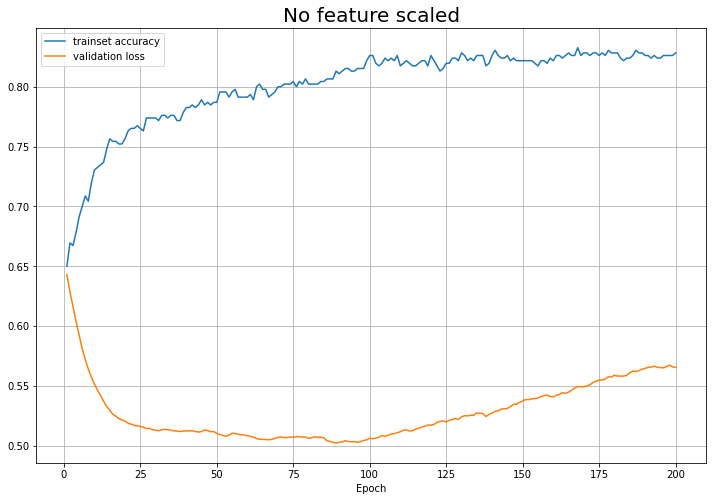

In [85]:
xs = np.arange(1, len(acc) + 1)     # epoch가 50이므로 그것보다 1 더해준다
plt.figure(figsize=(12, 8))
plt.plot(xs, history2.history['accuracy'], ms = 10, label = 'trainset accuracy')
plt.plot(xs, history2.history['val_loss'], ms = 10, label = 'validation loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.title('No feature scaled', fontsize = 20)
plt.show()